<a href="https://colab.research.google.com/github/yanlinhares/yan/blob/main/termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

from numpy import * ##importa a biblioteca numpy de forma completa
from matplotlib.pyplot import * ##biblioteca de plotagem de gráficos

pot = 2.4                           #potência em kW
custo_elet = 0.7922                 #custo em R$/kWh
custo_gas = 5.20                    #custo em R$/kWh
therm = 29.3                        #fator de conversão
n_elet = 0.76                       #eficiencia do aquecedor eletrico
n_gas = 0.4                         #eficiencia do aquecedor a gas

# energia util eletrica = potencia * eficiencia
e_util_elet = pot * n_elet
#potência necessário para forncer a mesma energia do aquecedor elétrico = energia util do aquecedor eletrico * eficiencia do aquecedor a gas
e_gas = e_util_elet / n_gas

#preco = energia util * custo
#preco = energia util * custo / fator de conversão
preco_elet =  e_util_elet *custo_elet
preco_gas = e_gas * custo_gas / therm

print(f'Energia útil fornecida pelo aquecedor elétrico {round(e_util_elet,3)} kW\nA energia fornecida ao aquecedor a gás \npara que o mesmo forneça a mesma taxa do aquecedor elétrico {round(e_gas,3)}kW')
print(f'Preço do custo unitário do aquecedor a energia eletrica R${round(preco_elet,3)}\nPreço do custo unitário do aquecedor a gas R${round(preco_gas,3)}')




Energia útil fornecida pelo aquecedor elétrico 1.824 kW
A energia fornecida ao aquecedor a gás 
para que o mesmo forneça a mesma taxa do aquecedor elétrico 4.56kW
Preço do custo unitário do aquecedor a energia eletrica R$1.445
Preço do custo unitário do aquecedor a gas R$0.809


In [27]:

pot = 1.39*(10**6)                #kcal/h
n1= 0.7                         #primeira eficiencia da caldeira
n2 = 0.8                        #segunda eficiencia da caldeira
t = 4200                        #tempo que a caldeira trabalha em horas
custo = (21.95) /(2.52*(10**5))       #custo unitario em R$ para cada  kcal


energia1 = pot * n1 * t         #energia em kcal gasta em um ano com a eficencia 1
energia2 = pot * n2 * t         #energia em kcal gasta em um ano com a eficiencia 2

custo1 = custo * energia1       #custo de produção com a eficiencia 1
custo2 = custo * energia2       #custo de produção com a eficiencia 2

#a economia de energia no ano e o custo unitário da energia economizada após o ajuste da caldeira
# (considerando a mesma taxa de energia de saída para a eficiência de 70%).

economia = energia2 - energia1
economia_de_custo = custo2 - custo1

custo_unit_eco_01=custo/n1
custo_unit_oce_02=custo/n2

custo_unit_eng_eco = custo_unit_eco_01 - custo_unit_oce_02

print(f'energia gasta em um ano com a eficiencia de 70% {round(energia1,3)}kcal')
print(f'energia gasta em um ano com a eficiencia de 80% {round(energia2,3)}kcal')
print(f'economia de energia em um ano com a melhoria de eficiencia:  {round(economia,2)} kcal')
print(f'economia de custo em um ano com a melhoria de eficiencia : R$ {economia_de_custo}')

print(f'o custo unitario economizado é: {custo_unit_eng_eco}')


#Inclua também em sua análise a avaliação dos efeitos da nova eficiência de combustão sobre a energia economizada no ano e o custo unitário da energia economizada.
# Trabalhe com eficiências entre 0,7 e 0,9 (mínimo de cinco pontos) e os custos unitários de R$ 20,19/2,52105 kcal, R$ 25,23/2,52105 kcal e R$ 30,28/2,52105 kcal.
# Apresente o gráfico da energia economizada/ano versus eficiência e os custos unitários da energia economizada versus eficiência.

energia gasta em um ano com a eficiencia de 70% 4086600000.0kcal
energia gasta em um ano com a eficiencia de 80% 4670400000.0kcal
economia de energia em um ano com a melhoria de eficiencia:  583800000.0 kcal
economia de custo em um ano com a melhoria de eficiencia : R$ 50850.83333333337
o custo unitario economizado é: 1.555413832199548e-05


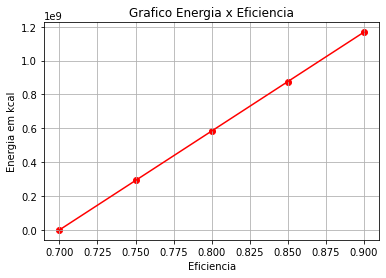

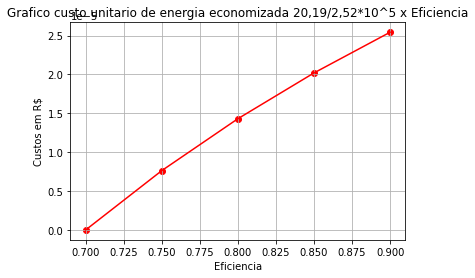

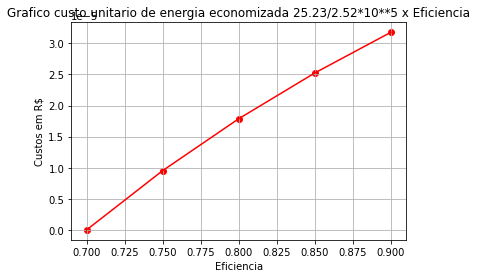

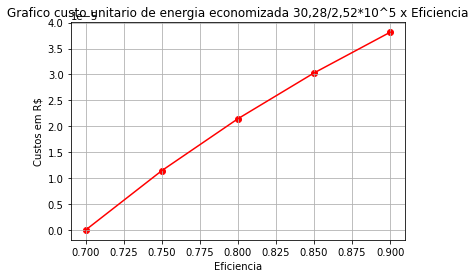

In [39]:
import matplotlib.pyplot as plt
import numpy as np
#-------------#Gerenado os Gráficos:---------
pot = (1.39*(10**6))                #kcal/h
eng = [0]*5
economia=583800000
hrs=4200                        #horas de trabalho da caldeira

j=0


#gerando as eficiencias entre 0.7 e 0.9

x=5
ef =np.linspace(0.7,0.9,x)                        #definindo um vetor para a eficiencia de 0.7 ate 0.9 com 5 valores

#Gerando o vetor da energia economizada

for i in range(0,x):                              #definindo a energia
   eng[i]= (pot*ef[i]-pot*ef[0])*hrs              #potencia de x - potencia de 0 * horas de trabalho da caldeira   

   

plt.plot(ef, eng,'r')                             #plotando o grafico
plt.title('Grafico Energia x Eficiencia')         #titulo do grafico
plt.xlabel('Eficiencia')                          #titulo do eixo x
plt.ylabel('Energia em kcal')                       #titulo do eixo y
plt.scatter(ef, eng, color='red')                 #escolhendo a cor dos pontos do grafico
plt.grid()
plt.show()                                        #mostrando o grafico




#plotando o grafico do custo unitario de R$ 20,19/2,52*10^5 kcal

custo_unit1 = (20.19) / (2.52*(10**5))                  #custo unitario do primeiro pedido

custos= [0]*5                                     #vetor para os custos unitarios economizados

for i in range(5):
  custos[i] = custo_unit1/ef[0] - custo_unit1/ef[i]   #custo economia unitario


plt.plot(ef,custos,'r')                             #plotando o grafico
plt.title('Grafico custo unitario de energia economizada 20,19/2,52*10^5 x Eficiencia')           #titulo do grafico
plt.xlabel('Eficiencia')                            #titulo do eixo x
plt.ylabel('Custos em R$')                          #titulo do eixo y
plt.scatter(ef, custos, color='red')                #escolhendo a cor dos pontos do grafico
plt.grid()
plt.show()                                          #mostrando o grafico

#plotando o grafico do custo unitario de 25.23/2.52*10**5

custo_unit2 = (25.23)/(2.52*(10**5))           #custo unitario
custos2=  [0]*5                          #vetor para os custos unitarios economizados

for i in range(5):
  custos2[i]=custo_unit2/ef[0]-custo_unit2/ef[i]

plt.plot(ef,custos2,'r')                             #plotando o grafico

plt.title('Grafico custo unitario de energia economizada 25.23/2.52*10**5 x Eficiencia')           #titulo do grafico
plt.xlabel('Eficiencia')                            #titulo do eixo x
plt.ylabel('Custos em R$')                          #titulo do eixo y
plt.scatter(ef, custos2, color='red')                #escolhendo a cor dos pontos do grafico
plt.grid()
plt.show()                                          #mostrando o grafico


#plotando o grafico do custo unitario de 30,28/2,52*10^5

custo_unit3 = (30.28)/(2.52*(10**5))           #custo unitario
custos3=  [0]*5                          #vetor para os custos unitarios economizados

for i in range(5):
  custos3[i]=custo_unit3/ef[0]-custo_unit3/ef[i]

plt.plot(ef,custos3,'r')                             #plotando o grafico

plt.title('Grafico custo unitario de energia economizada 30,28/2,52*10^5 x Eficiencia')           #titulo do grafico
plt.xlabel('Eficiencia')                            #titulo do eixo x
plt.ylabel('Custos em R$')                          #titulo do eixo y
plt.scatter(ef, custos3, color='red')                #escolhendo a cor dos pontos do graficopl.t
plt.grid()
plt.show()                                          #mostrando o grafico
































